# BDAT1004 - Problem Set 3

### Student Name: Ping Tsam Tsang
### Student ID: 200504374

_______________________________________________________________________________________________________

## __Question 1 - Occupations__

In [1]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users

import pandas as pd

users_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(users_url, sep='|', index_col = 'user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [2]:
#Step 4. Discover what is the mean age per occupation

users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [3]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

def gender(i):
    if i == 'M':
        return 1
    if i == 'F':
        return 0
users['gs'] = users['gender'].apply(gender)

y = users.groupby('occupation').gs.sum() / users.occupation.value_counts() * 100
y.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [4]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [5]:
#Step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation', 'gender']).mean()

age   gs
occupation    gender                
administrator F       40.638889  0.0
              M       37.162791  1.0
artist        F       30.307692  0.0
              M       32.333333  1.0
doctor        M       43.571429  1.0
educator      F       39.115385  0.0
              M       43.101449  1.0
engineer      F       29.500000  0.0
              M       36.600000  1.0
entertainment F       31.000000  0.0
              M       29.000000  1.0
executive     F       44.000000  0.0
              M       38.172414  1.0
healthcare    F       39.818182  0.0
              M       45.400000  1.0
homemaker     F       34.166667  0.0
              M       23.000000  1.0
lawyer        F       39.500000  0.0
              M       36.200000  1.0
librarian     F       40.000000  0.0
              M       40.000000  1.0
marketing     F       37.200000  0.0
              M       37.875000  1.0
none          F       36.500000  0.0
              M       18.600000  1.0
other         F       35.472222  0.0
              M       34.028986  1.0
programmer    F       32.166667  0.0
              M       33.216667  1.0
retired       F       70.000000  0.0
              M       62.538462  1.0
salesman      F       27.000000  0.0
              M       38.555556  1.0
scientist     F       28.333333  0.0
              M       36.321429  1.0
student       F       20.750000  0.0
              M       22.669118  1.0
technician    F       38.000000  0.0
              M       32.961538  1.0
writer        F       37.631579  0.0
              M       35.346154  1.0

In [6]:
#Step 8. For each occupation present the percentage of women and men

gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'}) 
occup_count = users.groupby(['occupation']).agg('count')              
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100   
occup_gender.loc[:, 'gender'] 

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

______________________________________________________________________________________________________

## __Question 2 - Euro Teams__

In [7]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12

import pandas as pd
euro12_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(euro12_url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [8]:
#Step 4. Select only the Goal column

euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [9]:
#Step 5. How many team participated in the Euro2012?

euro12.shape[0]

16

In [10]:
#Step 6. What is the number of columns in the dataset?

euro12.info()

#Total 35 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [11]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [12]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [13]:
#Step 9. Calculate the mean Yellow Cards given per Team

round(discipline['Yellow Cards'].mean())

7

In [14]:
#Step 10. Filter teams that scored more than 6 goals

euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [15]:
#Step 11. Select the teams that start with G

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [16]:
#Step 12. Select the first 7 columns

euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [17]:
#Step 13. Select all columns except the last 3

euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [18]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


______________________________________________________________________________________

## __Question 3 - Housing__

In [19]:
#Step 1. Import the necessary libraries
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

import pandas as pd
import numpy as np

s1 = pd.Series(np.random.randint(1, 4, 100))
s2 = pd.Series(np.random.randint(1, 3, 100))
s3 = pd.Series(np.random.randint(10000, 30000, 100))
print(s1, s2, s3)

0     3
1     1
2     2
3     2
4     1
     ..
95    1
96    2
97    1
98    1
99    3
Length: 100, dtype: int32 0     1
1     2
2     2
3     1
4     2
     ..
95    2
96    2
97    1
98    2
99    2
Length: 100, dtype: int32 0     21786
1     21441
2     28774
3     21412
4     28584
      ...  
95    12230
96    24724
97    20303
98    22810
99    19958
Length: 100, dtype: int32


In [20]:
#Step 3. Create a DataFrame by joinning the Series by column

house = pd.concat([s1, s2, s3], axis=1)
house.head()

,0,1,2
0,3,1,21786
1,1,2,21441
2,2,2,28774
3,2,1,21412
4,1,2,28584


In [21]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

house.rename(columns={0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace = True)
house.head()

,bedrs,bathrs,price_sqr_meter
0,3,1,21786
1,1,2,21441
2,2,2,28774
3,2,1,21412
4,1,2,28584


In [22]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame() 
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,3
1,1
2,2
3,2
4,1
...,...
95,12230
96,24724
97,20303
98,22810


In [23]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

len(bigcolumn)

#It is not true

300

In [24]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,1
2,2
3,2
4,1
...,...
295,12230
296,24724
297,20303
298,22810


___________________________________________________________________________________________

## __Question 4 - Wind Statistics__

In [25]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

import pandas as pd
import datetime

data = pd.read_csv('C:\\Users\\JessT\\wind.txt', sep='\s+', parse_dates = [[0, 1, 2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [26]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [27]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [28]:
#Step 6. Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.

data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [29]:
#Step 7. Compute how many non-missing values there are in total.

data.shape[0] - data.isnull().sum()
#OR data.notnull.sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [30]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.

data.fillna(0).values.flatten().mean()

10.223864592840483

In [31]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.

loc_stats = data.loc[:, 'RPT':'MAL'].describe(percentiles=[])
loc_stats
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [32]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [33]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. 

data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [34]:
#Step 12. Downsample the record to a yearly frequency for each location

data.groupby(data.index.to_period('A')).mean() 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [35]:
#Step 13. Downsample the record to a monthly frequency for each location.

data.groupby(data.index.to_period('M')).mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613


In [36]:
#Step 14. Downsample the record to a weekly frequency for each location.

data.groupby(data.index.to_period('W')).mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


In [37]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week 
#(assume that the first week starts on January 2 1961) for the first 52 weeks.

weekly = data.resample('W').agg(['min', 'max', 'mean', 'std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

_______________________________________________________________

## __Question 5 - Chipo__

In [38]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [39]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [40]:
#Step 5. What is the number of observations in the dataset?

chipo.shape[0]

4622

In [41]:
#Step 6. What is the number of columns in the dataset?

chipo.shape[1]

5

In [42]:
#Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [43]:
#Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [44]:
#Step 9. Which was the most-ordered item?
#Step 10. For the most-ordered item, how many items were ordered?

mosto = chipo.groupby('item_name')
mosto = mosto.sum()
mosto = mosto.sort_values(['quantity'], ascending=False)
mosto.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [45]:
#Step 11. What was the most ordered item in the choice_description column?

mosto = chipo.groupby('choice_description').sum()
mosto = mosto.sort_values(['quantity'], ascending=False)
mosto.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [46]:
#Step 12. How many items were orderd in total?

total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

In [47]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

chipo.item_price.dtype
dollarizer = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)
chipo.item_price.dtype

dtype('float64')

In [48]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print('The revenue for the period was :$',str(np.round(revenue, 2)))

The revenue for the period was :$ 39237.02


In [49]:
#Step 15. How many orders were made in the period?

orders = chipo.order_id.value_counts().count()
orders

1834

In [50]:
#Step 16. What is the average revenue amount per order?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
orders = chipo.order_id.value_counts().count()
avg = revenue/orders
avg

21.39423118865867

In [51]:
#Step 17. How many different items are sold?

chipo['item_name'].nunique()

50

_______________________________________________________________

## __Question 6 - Line Plot - Marriages and Divorces__

<AxesSubplot:title={'center':'Line Chart - Number of Marriages and Divorces in the U.S. (1867 - 2014)'}, xlabel='Year', ylabel='Number of Marriages/ Divorces'>

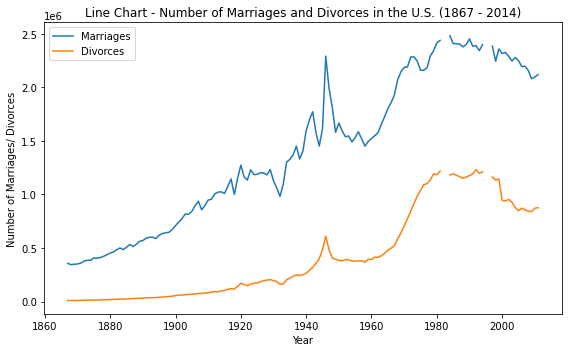

In [52]:
import pandas as pd
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

columns = ['Year', 'Marriages', 'Divorces']

df = pd.read_csv("C:\\Users\\JessT\\us-marriages-divorces-1867-2014.csv", usecols=columns)
df.set_index("Year").plot(title='Line Chart - Number of Marriages and Divorces in the U.S. (1867 - 2014)',
                          xlabel='Year', ylabel = 'Number of Marriages/ Divorces')


________________________________________________________________________

## __Question 7 - Bar Chart - Marriages and Divorces__

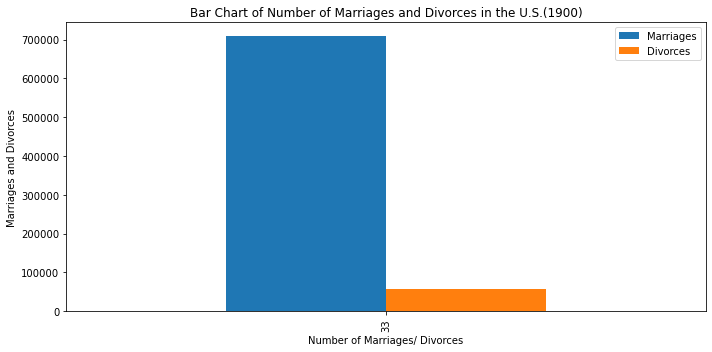

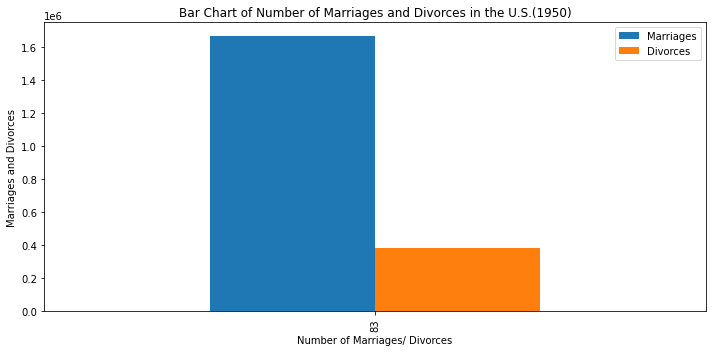

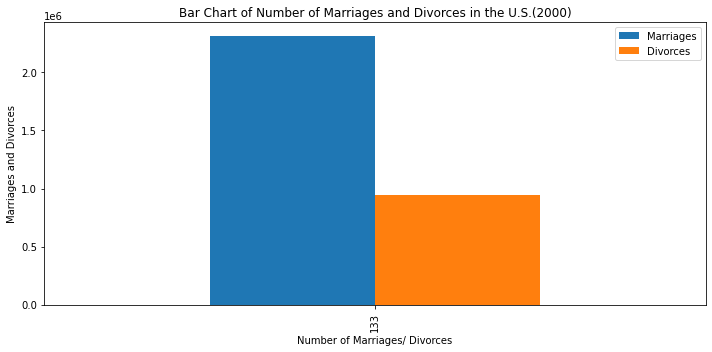

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\JessT\\us-marriages-divorces-1867-2014.csv")

rows = (df['Year']==1900)
columns = ['Marriages', 'Divorces']
result = df.loc[rows,columns].head(10)
#result.set_index('Year',inplace=True)

chart = result.plot(kind='bar',title='Bar Chart of Number of Marriages and Divorces in the U.S.(1900)'
                    ,xlabel='Number of Marriages/ Divorces', ylabel = 'Marriages and Divorces'
                    ,legend=True,figsize=(10,5))

plt.show()

rows = (df['Year']==1950)
columns = ['Marriages', 'Divorces']
result = df.loc[rows,columns].head(10)
#result.set_index('Year',inplace=True)

chart = result.plot(kind='bar',title='Bar Chart of Number of Marriages and Divorces in the U.S.(1950)'
                    ,xlabel='Number of Marriages/ Divorces', ylabel = 'Marriages and Divorces'
                    ,legend=True,figsize=(10,5))

plt.show()

rows = (df['Year']==2000)
columns = ['Marriages', 'Divorces']
result = df.loc[rows,columns].head(10)
#result.set_index('Year',inplace=True)

chart = result.plot(kind='bar',title='Bar Chart of Number of Marriages and Divorces in the U.S.(2000)'
                    ,xlabel='Number of Marriages/ Divorces', ylabel = 'Marriages and Divorces'
                    ,legend=True,figsize=(10,5))

plt.show()

_______________________________________________________________________________

## __Question 8 - Horizontal Bar Chart - Hollywood__

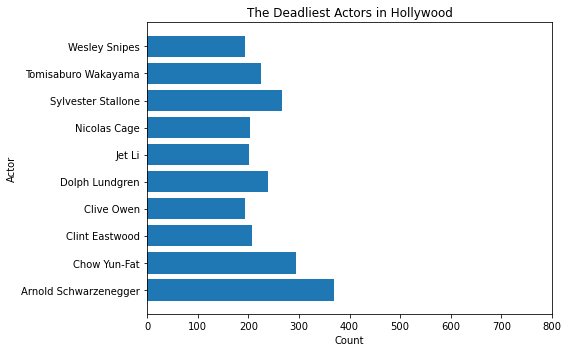

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\JessT\\actor_kill_counts.csv")

rows = df['Count']       
columns = df['Actor']  
y=np.arange(len(columns))                   
x=np.arange(0, 900, 100) 
x=np.sort(x)
plt.barh(y, rows)                                   
plt.yticks(y, columns)                         
x_ticks=np.arange(0,900,100)                  
plt.xticks(x, x_ticks)                         
plt.title('The Deadliest Actors in Hollywood')        
plt.xlabel('Count')                       
plt.ylabel('Actor')                              
plt.show()

__________________________________________________________________________________

## __Question 9 - Pie Chart - Roman Emperors__

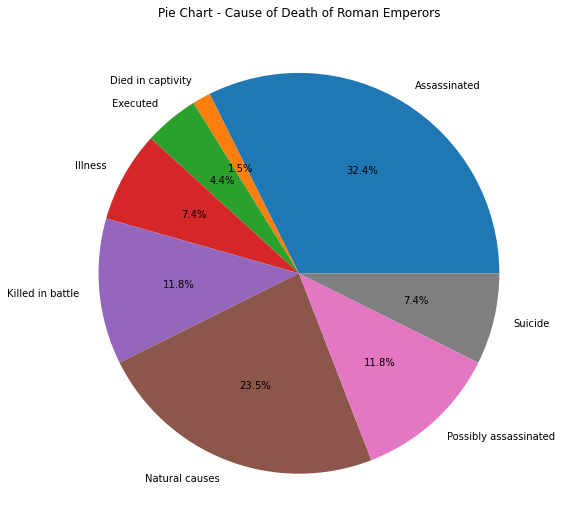

In [55]:
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv("C:\\Users\\JessT\\roman-emperor-reigns.csv")
df = df_raw.groupby('Cause_of_Death').size()

df.plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%3.1f%%',pctdistance=0.6)
plt.title("Pie Chart - Cause of Death of Roman Emperors")
plt.ylabel("")
plt.show()

___________________________________________________________________________________________

## __Question 10 - Scatter Plot - Computer Science PhDs awarded__

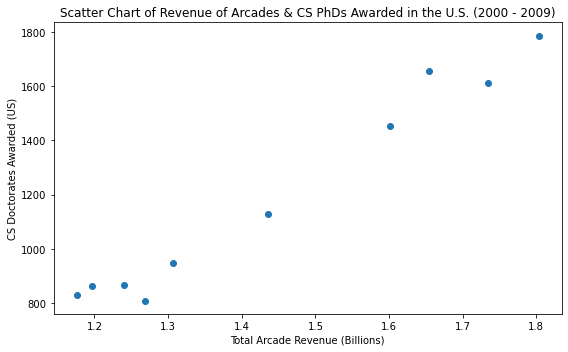

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

ar = pd.read_csv("C:\\Users\\JessT\\arcade-revenue-vs-cs-doctorates.csv")
plt.scatter(ar['Total Arcade Revenue (billions)'],ar['Computer Science Doctorates Awarded (US)'])
plt.title("Scatter Chart of Revenue of Arcades & CS PhDs Awarded in the U.S. (2000 - 2009)")
plt.xlabel('Total Arcade Revenue (Billions)')
plt.ylabel('CS Doctorates Awarded (US)')
plt.show()